**Disease:** Malaria

**Data:** Haematological Data

**Classifier:** Random Forest

**Required Python Libraries:** numpy/scipy/pandas/matplotlib/seaborn/scikit-learn

In [1]:
!pip install numpy
!pip install scipy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_file="/content/malaria_clinical_data.csv"
dataframe=pd.read_csv(data_file)

In [4]:
dataframe.shape

(2207, 34)

In [5]:
dataframe.head(n=10)

,SampleID,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,CCS20043,yes,Navrongo,2004,NaN,Yes,38.0,Not Known / Missing entry,NaN,Positive,...,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,CCS20102,yes,Navrongo,2004,NaN,Yes,38.2,Not Known / Missing entry,NaN,Positive,...,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,CCS20106,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,CCS20147,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,CCS20170,yes,Navrongo,2004,NaN,Yes,37.1,Not Known / Missing entry,NaN,Positive,...,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0
5,CCS20183,yes,Navrongo,2003,NaN,Yes,38.1,Not Known / Missing entry,NaN,Positive,...,383.0,4.9,7.2,66.6,21.6,11.8,6.0,1.8,1.0,18.7
6,CCS20249,yes,Navrongo,2004,NaN,Yes,39.7,Not Known / Missing entry,NaN,Positive,...,297.0,14.1,6.6,77.0,18.2,4.8,19.4,4.5,1.1,16.5
7,CCS20260,yes,Navrongo,2004,NaN,Yes,36.0,Not Known / Missing entry,NaN,Positive,...,103.0,14.2,7.3,43.0,50.2,6.8,2.5,2.7,0.3,16.5
8,CCS20273,yes,Navrongo,2003,NaN,Yes,38.2,Not Known / Missing entry,NaN,Positive,...,41.0,10.0,7.0,58.6,23.3,18.1,6.9,2.6,2.0,16.9
9,CCS20292,yes,Navrongo,2004,NaN,Yes,38.7,Not Known / Missing entry,NaN,Positive,...,97.0,13.6,6.6,63.5,21.0,15.5,5.5,1.7,1.2,15.2


In [6]:
dataframe.columns

Index(['SampleID', 'consent_given', 'location', 'Enrollment_Year', 'bednet',
       'fever_symptom', 'temperature', 'Suspected_Organism',
       'Suspected_infection', 'RDT', 'Blood_culture', 'Urine_culture',
       'Taq_man_PCR', 'parasite_density', 'Microscopy', 'Laboratory_Results',
       'Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SampleID                2207 non-null   object 
 1   consent_given           2207 non-null   object 
 2   location                2207 non-null   object 
 3   Enrollment_Year         2207 non-null   int64  
 4   bednet                  1676 non-null   object 
 5   fever_symptom           2200 non-null   object 
 6   temperature             2197 non-null   float64
 7   Suspected_Organism      2207 non-null   object 
 8   Suspected_infection     1569 non-null   object 
 9   RDT                     2065 non-null   object 
 10  Blood_culture           122 non-null    object 
 11  Urine_culture           112 non-null    object 
 12  Taq_man_PCR             176 non-null    object 
 13  parasite_density        2173 non-null   float64
 14  Microscopy              2170 non-null   

In [8]:
#interested columns: "Clinical diagnosis" up to "RBC_dist_width_Percent"
subset=dataframe.iloc[:,16:]

In [9]:
subset.shape

(2207, 18)

In [10]:
subset.isnull().sum()

Clinical_Diagnosis         0
wbc_count                  0
rbc_count                  0
hb_level                   0
hematocrit                 0
mean_cell_volume           0
mean_corp_hb               3
mean_cell_hb_conc          2
platelet_count             9
platelet_distr_width      32
mean_platelet_vl          17
neutrophils_percent        0
lymphocytes_percent        0
mixed_cells_percent        0
neutrophils_count         12
lymphocytes_count         11
mixed_cells_count         11
RBC_dist_width_Percent     9
dtype: int64

In [11]:
subset.dropna(inplace=True)

In [12]:
subset.shape

(2156, 18)

In [13]:
subset.columns

Index(['Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [14]:
subset['Clinical_Diagnosis'].unique()

array(['Severe Malaria', 'Uncomplicated Malaria', 'Non-malaria Infection'],
      dtype=object)

In [15]:
labels=pd.Categorical(subset['Clinical_Diagnosis'])

In [16]:
labels

['Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', ..., 'Uncomplicated Malaria', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection']
Length: 2156
Categories (3, object): ['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria']

In [17]:
subset.head()

,Clinical_Diagnosis,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,Severe Malaria,5.7,2.8,5.8,16.1,59.0,21.1,36.0,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,Severe Malaria,7.8,3.5,9.2,24.2,70.0,26.4,37.8,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,Severe Malaria,8.2,1.0,2.3,5.7,59.0,23.8,40.4,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,Severe Malaria,15.9,3.3,10.1,25.1,75.0,30.2,40.2,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,Severe Malaria,4.5,2.1,5.7,16.1,78.0,27.1,35.4,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0


In [18]:
subset['Clinical_Diagnosis'].value_counts()

Non-malaria Infection    966
Uncomplicated Malaria    702
Severe Malaria           488
Name: Clinical_Diagnosis, dtype: int64

<Axes: >

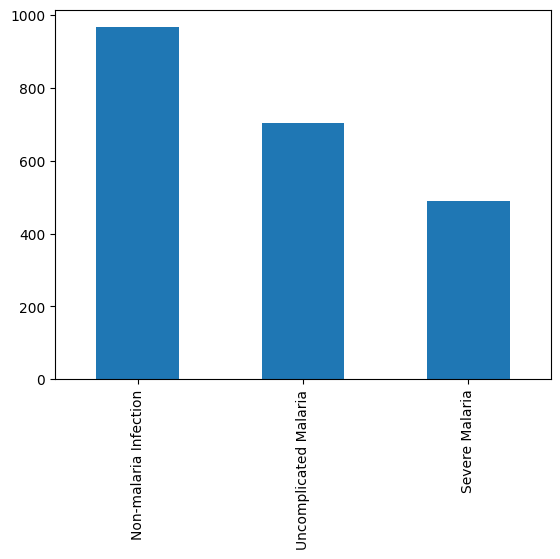

In [19]:
subset['Clinical_Diagnosis'].value_counts().plot.bar()

In [20]:
subset.iloc[:,1:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wbc_count,2156.0,10.723516,5.944994,0.5,6.80,9.30,12.900,53.90
rbc_count,2156.0,3.911679,1.132454,0.5,3.34,4.17,4.650,6.67
hb_level,2156.0,9.423010,2.650261,1.4,7.90,10.20,11.325,18.70
hematocrit,2156.0,29.320223,8.802975,4.3,24.20,31.70,35.500,52.70
mean_cell_volume,2156.0,74.828256,8.046383,7.8,70.00,75.00,80.000,121.00
mean_corp_hb,2156.0,24.142189,3.203595,2.1,22.20,24.10,26.200,38.80
mean_cell_hb_conc,2156.0,32.259318,2.864637,15.7,30.60,32.10,33.425,46.60
platelet_count,2156.0,214.545176,128.697718,3.0,105.00,201.00,300.250,1087.00
platelet_distr_width,2156.0,14.137894,3.064643,0.0,12.90,14.90,15.600,23.90
mean_platelet_vl,2156.0,8.031447,1.194886,3.3,7.20,7.90,8.800,18.60


In [21]:
subset.corr()

<ipython-input-21-5c83982c495b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  subset.corr()


,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
wbc_count,1.000000,-0.217584,-0.283881,-0.261736,-0.150900,-0.084770,0.066981,0.122330,0.022260,-0.100716,0.093870,-0.090940,-0.057664,0.876999,0.689196,0.715568,0.252208
rbc_count,-0.217584,1.000000,0.896557,0.922294,-0.017848,-0.348335,-0.497615,0.409424,0.001756,0.284809,0.077574,-0.073216,-0.056070,-0.134216,-0.233978,-0.200859,-0.364396
hb_level,-0.283881,0.896557,1.000000,0.968644,0.286931,0.023659,-0.302304,0.353828,0.068770,0.248323,0.162289,-0.158665,-0.093352,-0.153907,-0.338160,-0.273327,-0.562710
hematocrit,-0.261736,0.922294,0.968644,1.000000,0.279029,-0.101461,-0.479766,0.387830,0.091718,0.285169,0.119252,-0.113198,-0.083365,-0.152236,-0.294044,-0.253324,-0.510445
mean_cell_volume,-0.150900,-0.017848,0.286931,0.279029,1.000000,0.722231,-0.077781,-0.002473,0.268485,0.038404,0.094697,-0.079596,-0.111013,-0.080385,-0.168477,-0.199845,-0.413033
mean_corp_hb,-0.084770,-0.348335,0.023659,-0.101461,0.722231,1.000000,0.576017,-0.202177,0.094658,-0.189324,0.149581,-0.151628,-0.062552,-0.011729,-0.152329,-0.106754,-0.334053
mean_cell_hb_conc,0.066981,-0.497615,-0.302304,-0.479766,-0.077781,0.576017,1.000000,-0.310377,-0.187634,-0.329254,0.110667,-0.132823,0.043621,0.089524,-0.016254,0.090089,-0.013497
platelet_count,0.122330,0.409424,0.353828,0.387830,-0.002473,-0.202177,-0.310377,1.000000,0.070121,-0.036139,-0.056902,0.042694,0.089093,0.102714,0.078041,0.143232,-0.104004
platelet_distr_width,0.022260,0.001756,0.068770,0.091718,0.268485,0.094658,-0.187634,0.070121,1.000000,0.233941,0.001142,0.018399,-0.085652,0.015390,0.037808,-0.045928,-0.087467
mean_platelet_vl,-0.100716,0.284809,0.248323,0.285169,0.038404,-0.189324,-0.329254,-0.036139,0.233941,1.000000,-0.055283,0.052658,0.037840,-0.118462,-0.021988,-0.058788,-0.112433


<ipython-input-22-c747b418ff14>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(subset.corr(),cmap="coolwarm")


<Axes: >

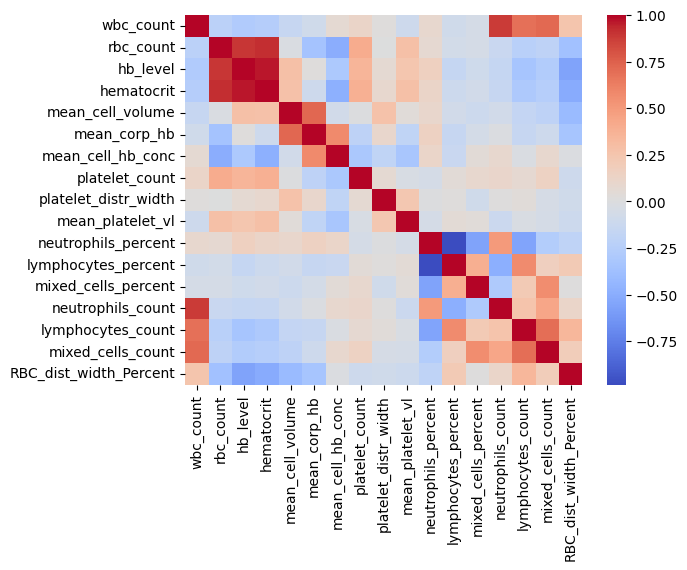

In [22]:
sns.heatmap(subset.corr(),cmap="coolwarm")

In [23]:
X=subset.iloc[:,1:]
y=subset.iloc[:,0]

In [24]:
X.shape

(2156, 17)

In [25]:
y.shape

(2156,)

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)

In [27]:
y_encoded[0:5]

array([1, 1, 1, 1, 1])

In [28]:
y[0:5]

0    Severe Malaria
1    Severe Malaria
2    Severe Malaria
3    Severe Malaria
4    Severe Malaria
Name: Clinical_Diagnosis, dtype: object

In [29]:
classes=label_encoder.classes_
classes

array(['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria'],
      dtype=object)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y_encoded,test_size=0.2)

In [31]:
X_train.shape

(1724, 17)

In [32]:
y_train.shape

(1724,)

In [33]:
X_test.shape

(432, 17)

In [34]:
y_test.shape

(432,)

In [35]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train_scaled=min_max_scaler.fit_transform(X_train)
X_test_scaled=min_max_scaler.fit_transform(X_test)

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [37]:
y_pred=clf.predict(X_test_scaled)

In [38]:
y_pred[0:3]

array([0, 1, 1])

In [39]:
y_test[0:3]

array([2, 1, 1])

In [40]:

from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [41]:
balanced_accuracy=balanced_accuracy_score(y_test,y_pred)
balanced_accuracy=round(balanced_accuracy,2)
print('balanced_accuracy: ',balanced_accuracy)

balanced_accuracy:  0.72


In [42]:
f1score=f1_score(y_test,y_pred,average='weighted')
f1score=round(f1score,2)
print('f1score: ',f1score)

f1score:  0.71


In [43]:
recall=recall_score(y_test,y_pred,average='weighted')
recall=round(recall,2)
print('recall: ',recall)

recall:  0.74


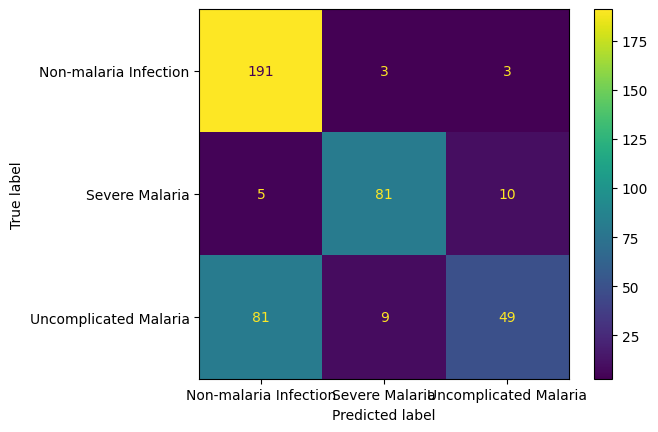

In [44]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()



In [45]:
# Predict on the training set
y_train_pred = clf.predict(X_train_scaled)

# Calculate metrics for the training set
train_balanced_accuracy = round(balanced_accuracy_score(y_train, y_train_pred), 2)
train_f1score = round(f1_score(y_train, y_train_pred, average='weighted'), 2)
train_recall = round(recall_score(y_train, y_train_pred, average='weighted'), 2)

print(f'Training Balanced Accuracy: {train_balanced_accuracy}')
print(f'Training F1 Score: {train_f1score}')
print(f'Training Recall: {train_recall}')


Training Balanced Accuracy: 1.0
Training F1 Score: 1.0
Training Recall: 1.0


In [47]:
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
from sklearn.model_selection import cross_val_score

# Apply cross-validation on the entire dataset
cv_scores = cross_val_score(clf, X_scaled, y_encoded, cv=5, scoring='accuracy')

print(f'CV Accuracy Scores: {cv_scores}')
print(f'CV Accuracy Mean: {np.mean(cv_scores)}')


CV Accuracy Scores: [0.82638889 0.85150812 0.84454756 0.78190255 0.72389791]
CV Accuracy Mean: 0.8056490074761535
